# Mandelbrot sets
The Mandelbrot sets are really amazing fractals. The set consists of all complex numbers c for which the sequence z\[n+1\] = z\[n\]\**2 + c converges to some value, i.e. it is bounded. 

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
def mandelbrot(x, y, threshold):
    """Calculates whether the number c = x + i*y belongs to the 
    Mandelbrot set. In order to belong, the sequence z[n + 1] = z[n]**2 + c
    must not diverge after 'threshold' number of steps. The sequence diverges
    if the absolute value of z[n+1] is greater than 4.
    
    :param float x: the x component of the initial complex number
    :param float y: the y component of the initial complex number
    :param int threshold: the number of iterations to considered it converged
    """
    # initial conditions
    c = complex(x, y)
    z = complex(0, 0)
    
    for i in range(threshold):
        z = z**2 + c
        if abs(z) > 4.:  # it diverged
            return i
        
    return threshold - 1  # it didn't diverge

## Make a plot

In [3]:
x_start, y_start = -2, -1.5  # an interesting region starts here
width, height = 3, 3  # for 3 units to the left and to the right
density_per_unit = 250  # how many pixles per unit

re = np.linspace(x_start, x_start + width, width * density_per_unit )  # real axis
im = np.linspace(y_start, y_start + height, height * density_per_unit)  # imaginary axis

X = np.empty((len(re), len(im)))  # the initial array-like image

In [4]:
threshold = 20  # max allowed iterations

# fill-in the image with the number of interations
for i in range(len(re)):
    for j in range(len(im)):
        X[i, j] = mandelbrot(re[i], im[j], threshold)

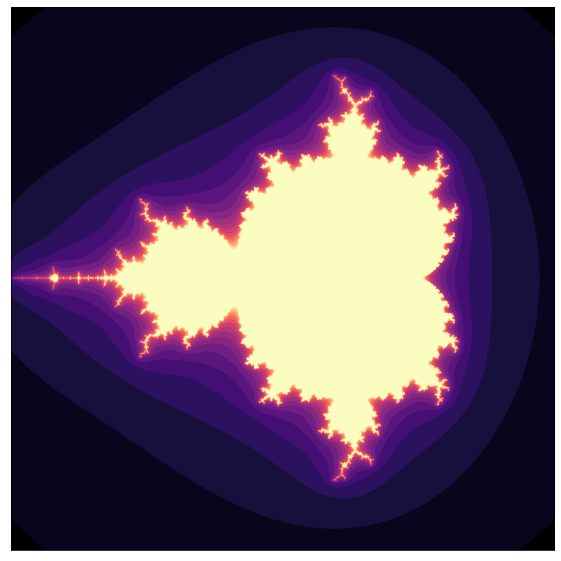

In [5]:
fig = plt.figure(figsize=(10, 10))

# formatting options: remove ticks
ax = plt.axes()
ax.set_xticks([], [])
ax.set_yticks([], [])

ax.imshow(X.T, interpolation="hanning", cmap='magma')
plt.savefig('mandelbrot.png', dpi=300, bbox_inches='tight')

## Create an animation as the sequence converges

In [6]:
x_start, y_start = -2, -1.5  # an interesting region starts here
width, height = 3, 3  # for 3 units to the left and to the right
density_per_unit = 250  # how many pixles per unit

re = np.linspace(x_start, x_start + width, width * density_per_unit )  # real axis
im = np.linspace(y_start, y_start + height, height * density_per_unit)  # imaginary axis

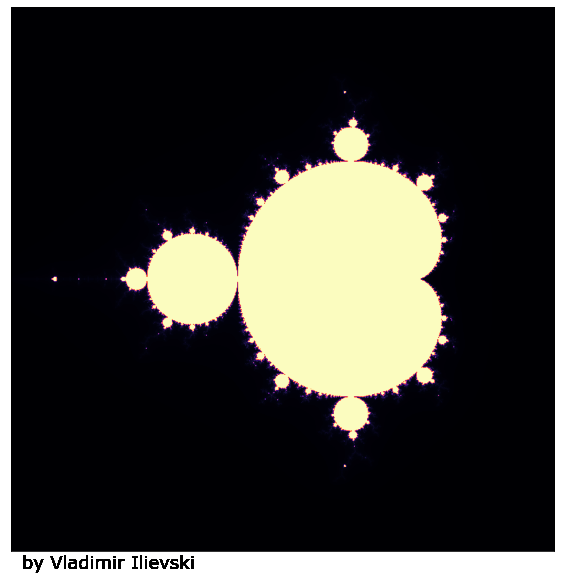

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

def animate(i):
    # clear axes object
    ax.clear()
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    
    X = np.empty((len(re), len(im)))  # re-initialize the array-like image
    threshold = round(1.15**(i + 1))  # calculate the current threshold
    
    # calculate the iterations for the current threshold
    for i in range(len(re)):
        for j in range(len(im)):
            X[i, j] = mandelbrot(re[i], im[j], threshold)
    
    img = ax.imshow(X.T, interpolation="hamming", cmap='magma')
    plt.gcf().text(0.15, 0.1, 'by Vladimir Ilievski', fontsize=18, fontfamily='Verdana')
    return [img]

# call the animator	 
anim = animation.FuncAnimation(fig, animate, frames=45, interval=120, blit=True)
# save the animation as a gif file 
anim.save('mandelbrot.gif',writer='imagemagick') 